Random Forest

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\DataScience25\\official_assignments\\Random Forest\\Random Forest\\glasss.csv")

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


1.Exploratory Data Analysis (EDA):

In [6]:
df.shape

(214, 10)

In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no null values in the dataset.

Finding Statistical Summary of the Dataset:

In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


RI(Refractive Index):      
Mean value is 1.518, with very low standard deviation.The distribution is approximately normal

Na(Sodium):                
Mean is 13.40.The distribution is roughly normal, but outliers are present at the higher end.

Mg(Magnesium):                   
Mean is 2.68, and minimum value is 0.Distribution is slightly left-skewed.Outliers are present.

Al(Aluminium):                   
Mean value is 1.44, and max is 3.5.Distribution is relatively uniform with a few high-end outliers.

Si(Silicon):            
Mean is 72.65,Appears to have a nearly uniform distribution.Few lower-end outliers may be present.

K(Potassium):         
Mean is 0.49, but values range up to 6.21, indicating significant high-end outliers.Slightly right-skewed distribution.

Ca(Calcium):            
Mean is 8.95, and the maximum is 16.19.Distribution appears uniform, but outliers are present at higher values.

Ba(Barium):                   
Right skewed distribution.

Fe(Iron):                         
Mean is 0.05, with most values near 0 and max around 0.51.Shows right-skewed distribution.

Type:                      
Multi-class variable ranging from 1 to 7 (excluding class 4).This is the target feature for classification.



2:Data Visualization:


Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Histogram:

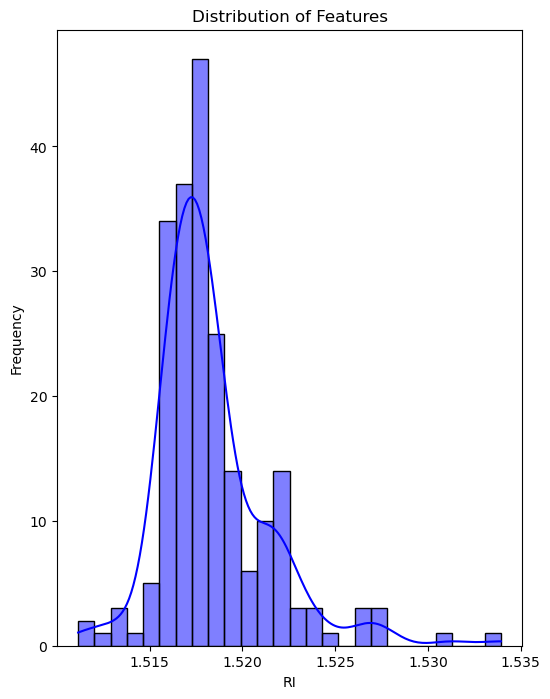

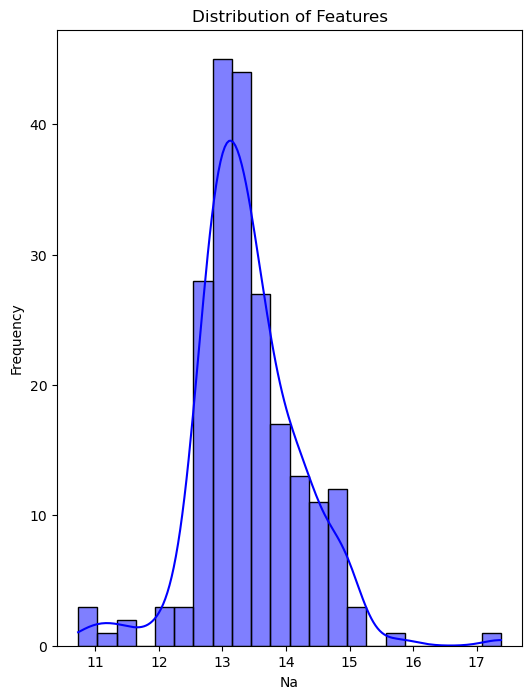

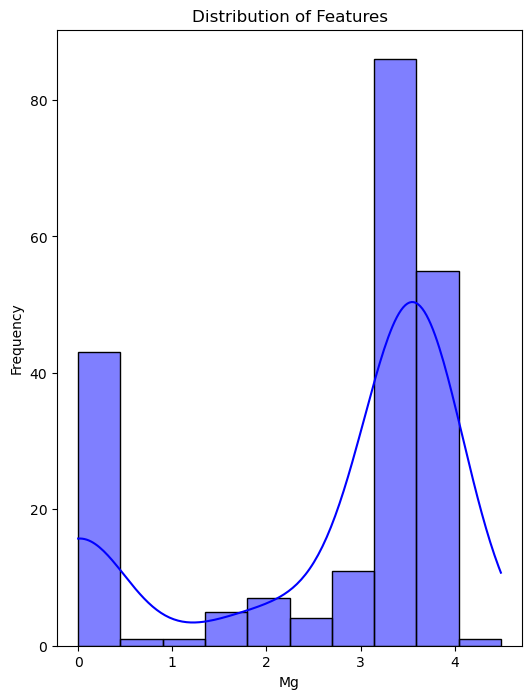

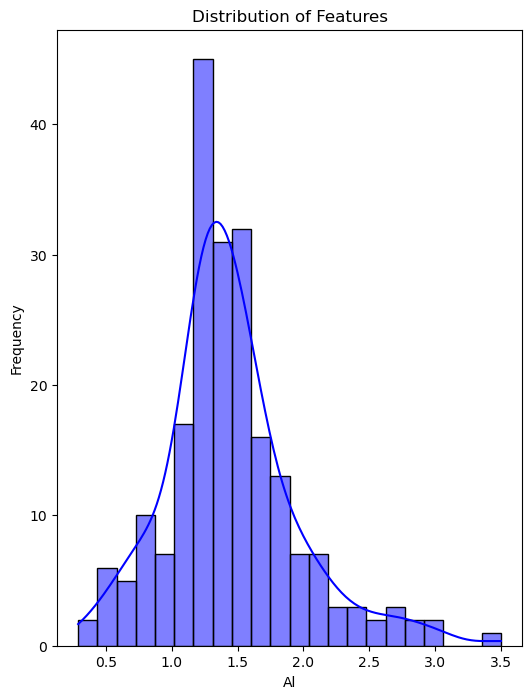

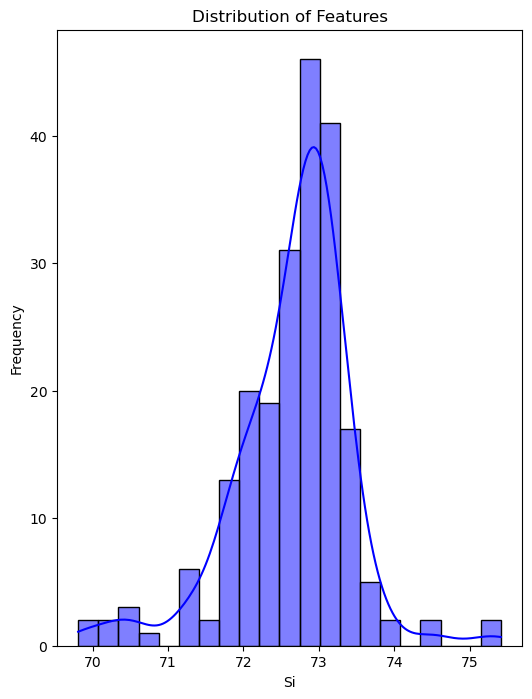

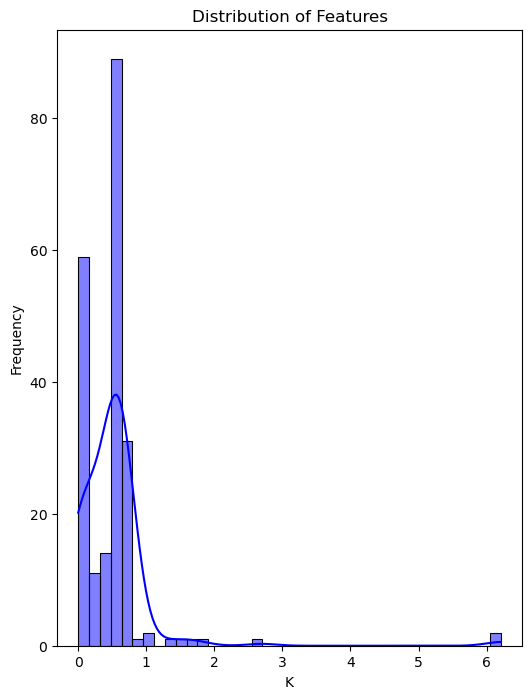

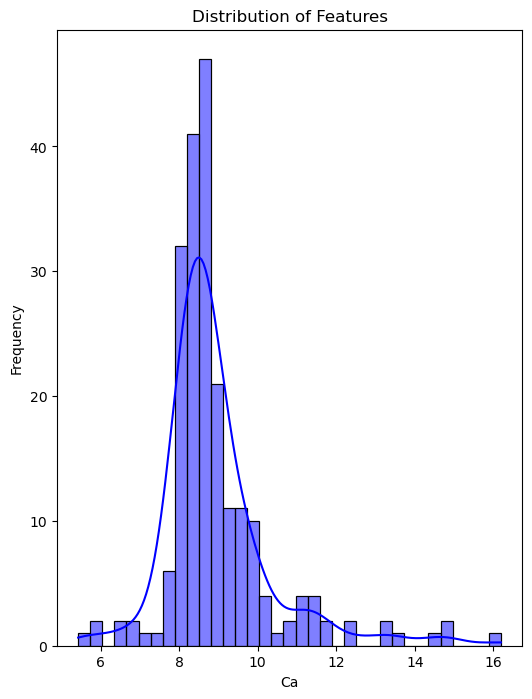

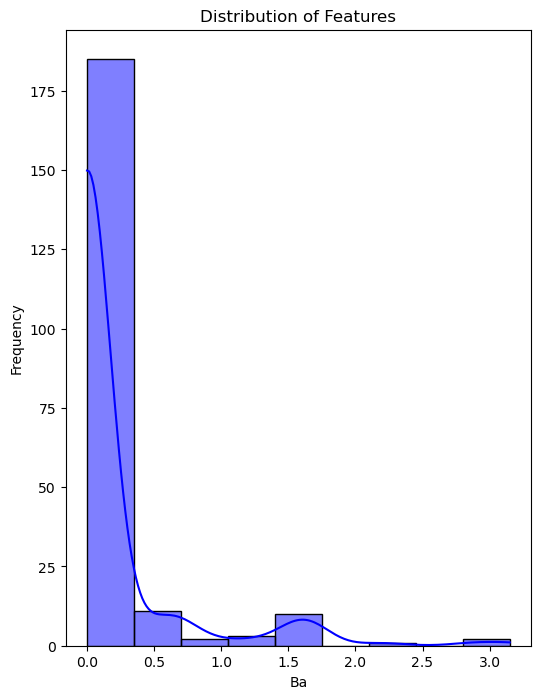

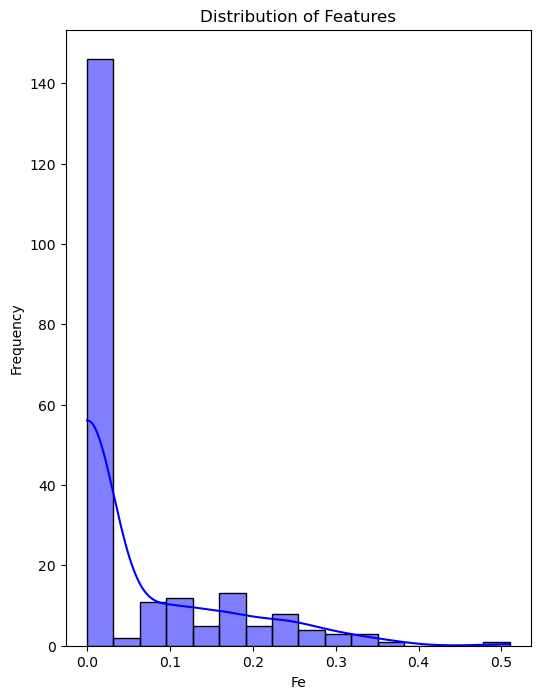

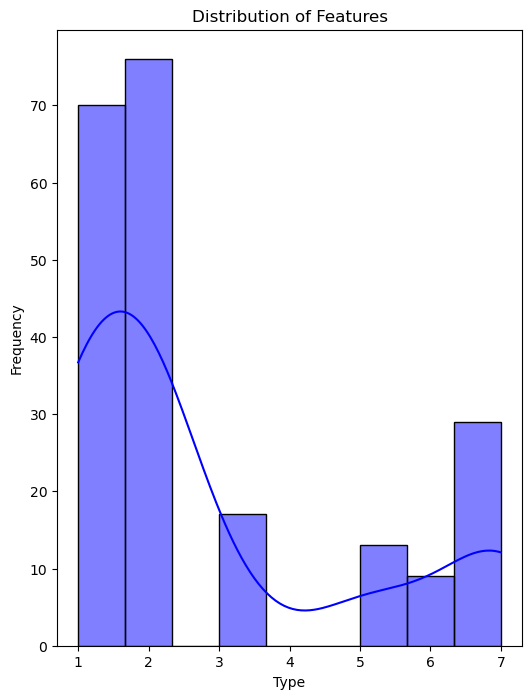

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns



for cols in df.columns:
    plt.figure(figsize=(6,8))
    sns.histplot(df[cols],color="Blue",edgecolor='black',kde=True)
    plt.xlabel(f"{cols}")
    plt.ylabel("Frequency")
    plt.title("Distribution of Features")

plt.show()

Na,Al,Si are showing uniform distribution.Ba and Fe are highly right skewed.Mg is left skewed.

BoxPlot:

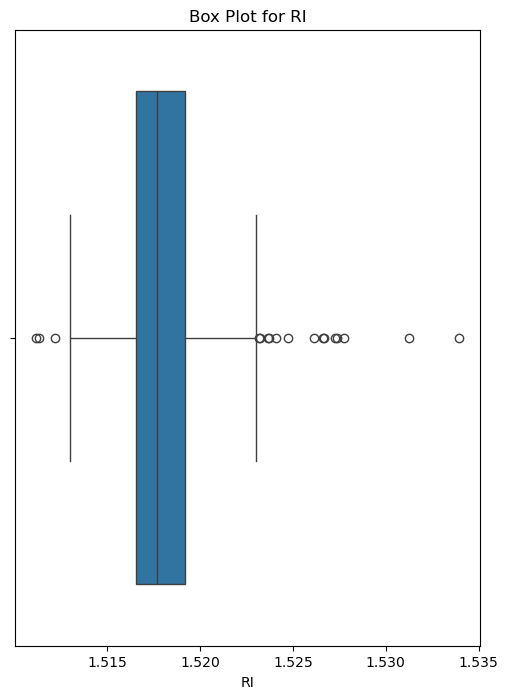

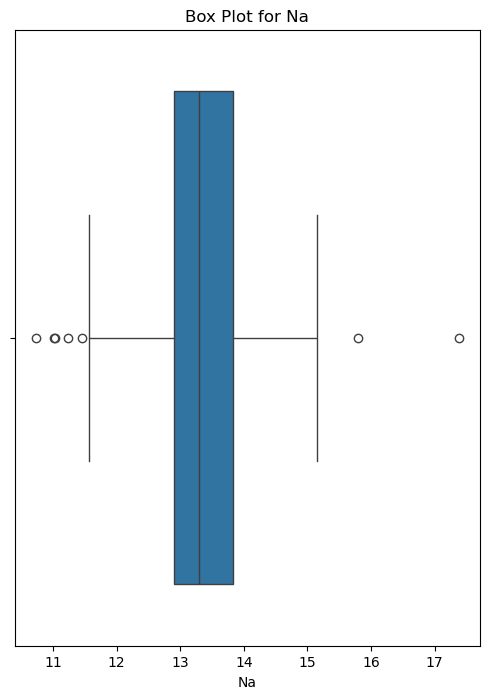

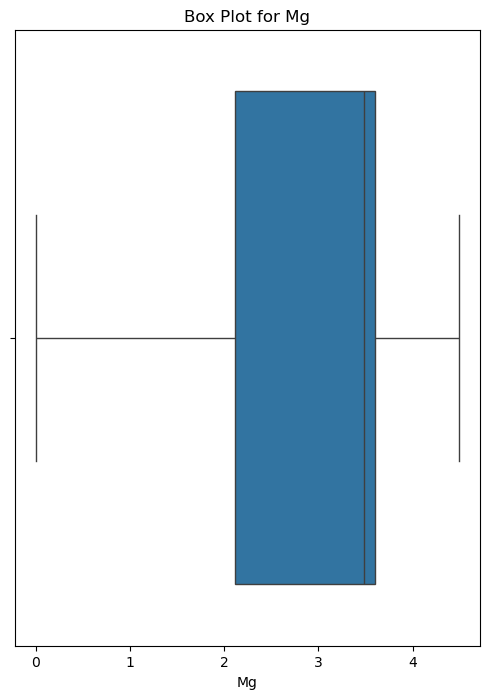

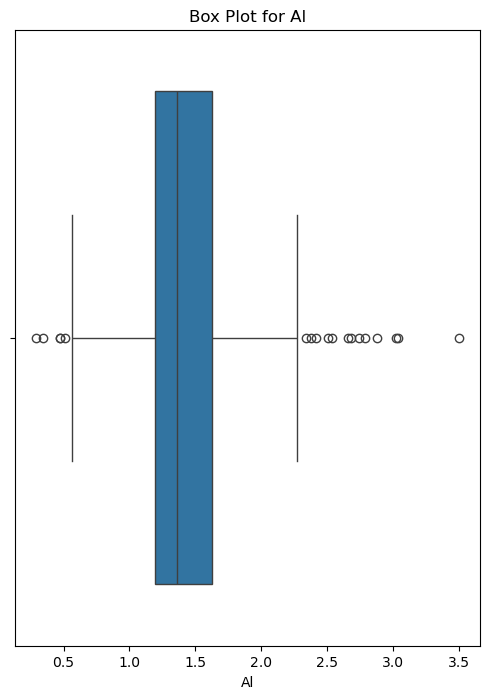

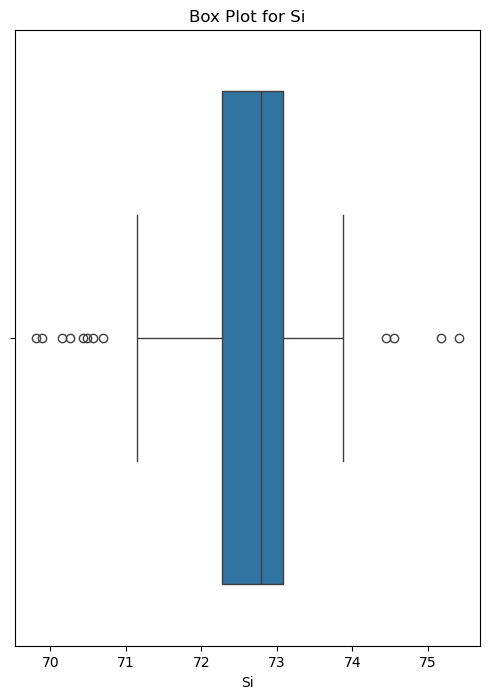

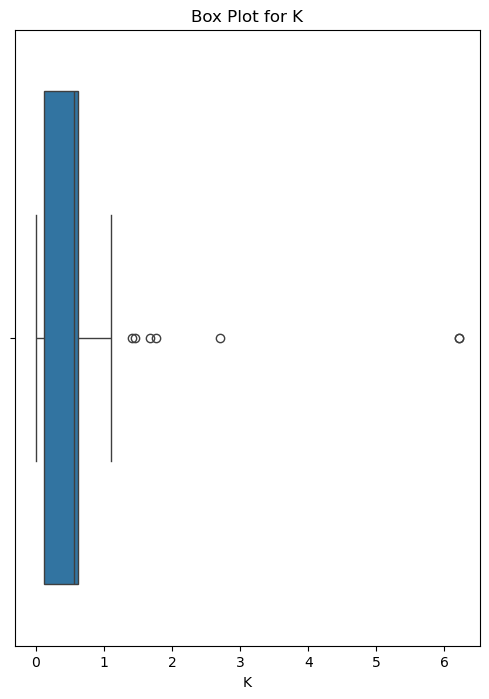

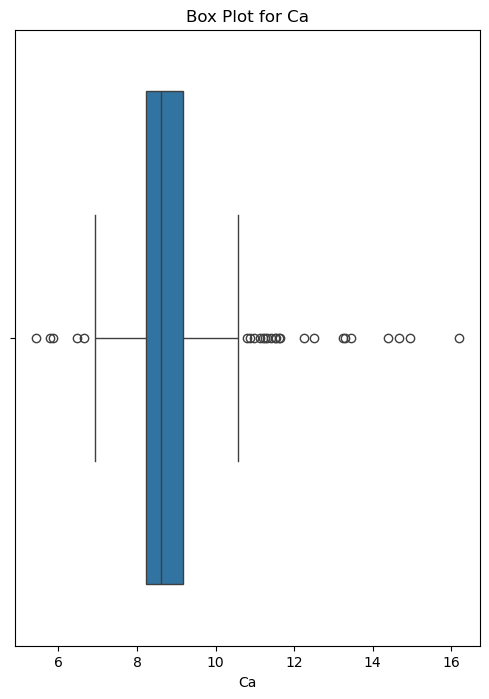

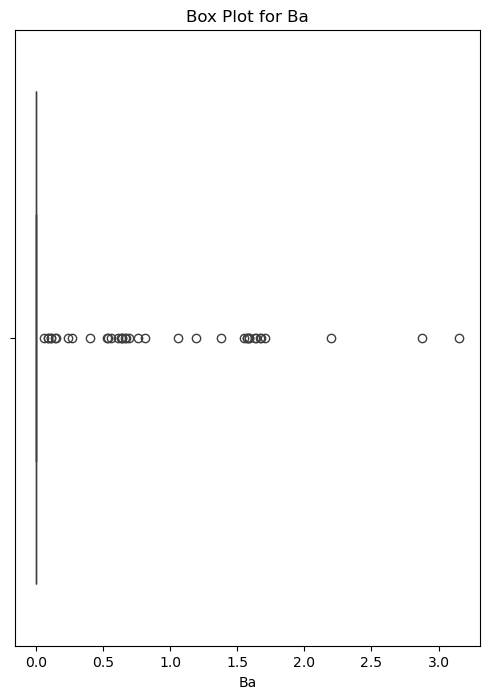

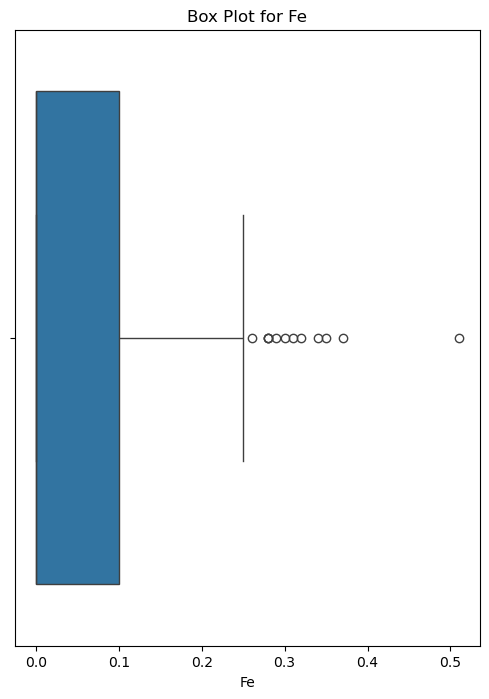

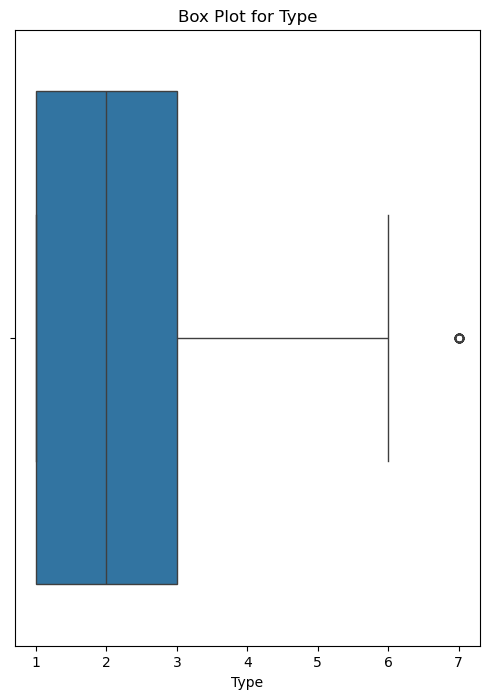

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns



for cols in df.columns:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df[cols])
    plt.title(f"Box Plot for {cols}")

plt.show()

Ri has few outliers on both upper and lower end.

Na has mild  outliers on the lower end.

Mg has no visible outliers.

Aluminium has some outliers at higher end.

Si has minor outliers more on the lower end.

K has outliers mostly on the higher end.

Ca has many outliers on the upper end.

Ba large number of outliers at upper end.

Fe  has Few upper-end outliers.

Analyze any patterns or correlations observed in the data.


In [22]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


RI:           
Is strongly positively correlated with Ca(0.81) and is weakly negatively correlated with the target variable Type(-0.16).And moderately negatively correlated with Al and Si.

Na:                    
Is moderately positively correlated with the target variable Type.Weakly positively correlated with Ba.

Mg:                          
Mg is strongly negatively correlated with Type.and has weak negative and positive correlation with rest of the features.

Al:
Is moderate positively correlated with Type. Has negative correlations with Si,Ca and Fe.

Si:                       
Very weak positive correlation with Type.Negative correlation with most other features

K:                 
Has weak negative correlation with Ca,Ba,Fe and Type.

Ca:                 
Has weak negative correlation with Ba.Weak positive with Fe and very weak positive with Type.

Ba:                   
Has moderate positive correlation with Type and negative with Fe.

Fe:
Has  a weak negative correlation with Type.

The most poitively correlated features are RI and Ca.

The most negatively correlated features are Mg and Type.

3:Data Preprocessing


1.Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.


In [26]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No missing values are present in the dataset.

2.If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

In [29]:
df.select_dtypes("object").columns

Index([], dtype='object')

No categorical columns are present in the dataset.

3.Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [32]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
scaled_data=ss.fit_transform(df.drop('Type', axis=1))

4:Random Forest Model Implementation


1.Divide the data into train and test split.

In [35]:
x = pd.DataFrame(scaled_data, columns=df.drop('Type', axis=1).columns)

In [36]:
y=df['Type']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
random_model=RandomForestClassifier()

Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [43]:
random_model.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=random_model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [79]:
print("Accracy Score:",accuracy_score(y_test,y_pred))

Accracy Score: 0.8604651162790697


In [85]:
print("Precision Score:",precision_score(y_test,y_pred,average="weighted"))

Precision Score: 0.881512802443035


In [87]:
print("Recall Score:",recall_score(y_test,y_pred,average="weighted"))

Recall Score: 0.8604651162790697


In [89]:
print("F1 Score:",f1_score(y_test,y_pred,average="weighted"))

F1 Score: 0.8573412907202236


In [103]:
print("Classification report:")
print(classification_report(y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.91      0.71      0.80        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.92      0.86      0.87        43
weighted avg       0.88      0.86      0.86        43



The model has an average of 0.86 which means it correctly predicted the glass type for 86% of the test samples.

Class 1 has 100% recall, meaning the model caught all true instances of class 1.

Class 3 & 5 have lower recall, so the model might be missing some of these — potentially due to fewer samples.

Class 6 is perfectly predicted.



5:Bagging and Boosting Methods


Apply the Bagging and Boosting methods and compare the results.


In [115]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [107]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

In [117]:
ada_model.fit(x_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [111]:
y_pred_ada = ada_model.predict(x_test)

In [119]:
print("Classification Report - AdaBoost:")
print(classification_report(y_test, y_pred_ada))


Classification Report - AdaBoost:
              precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43



In [121]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [127]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [129]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [131]:
y_pred_gb = gb_model.predict(x_test)

In [133]:
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43



Implemented Random Forest first which is a Bagging Approach and gave an accuracy of 86% which emans it showed high performnace on the dataset.

Then Implemented AdaBoost which is a Boosting Approach and gave an accuracy of 49% indicating it performed verly porrly on the dataset.

Then implemented Gradient Boosting which is again a Boosting Approach gave same accuracy as Random Forest that is 86% which shows its ability to handle patterns effectively.

Both random Forest and Gradient Boosting gave high accuracy which makes them suitable for this dataset.

Additional Notes:


1.Explain Bagging and Boosting methods. How is it different from each other.

- Bagging (Bootstrap Aggregating):
Bagging is an ensemble technique where multiple models (usually the same algorithm, like decision trees) are trained in parallel on different random subsets of the training data. The final output is obtained by averaging the predictions (for regression) or taking a majority vote (for classification).

    Example: Random Forest is a classic example of a bagging method.

- Boosting:
Boosting is also an ensemble technique, but models are trained sequentially, where each new model focuses on correcting the errors made by the previous one. It combines the predictions of weak learners (like shallow trees) in a weighted manner to form a strong model.

    Examples: AdaBoost, Gradient Boosting, XGBoost.

Difference between Bagging and Boosting:

- Training Style:

    - Bagging trains models in parallel, meaning all models are trained independently.

    - Boosting trains models sequentially, where each new model learns from the errors of the previous one.

- Focus:

    - Bagging gives equal importance to all models.

    - Boosting gives more importance to misclassified data points, so the next model can correct them.

- Overfitting Risk:

    - Bagging has a lower risk of overfitting, especially with models like Random Forest.

    - Boosting has a higher chance of overfitting, but it can be controlled using parameters like learning rate.

2.Explain how to handle imbalance in the data.

- Resampling Techniques:

    - Oversampling: Increase samples of the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

    - Undersampling: Reduce samples of the majority class to balance the dataset.

- Use of Class Weights:

    - Many models (like Logistic Regression, SVM, Random Forest) allow setting class_weight='balanced' to give more importance to minority classes during training.

- Anomaly Detection Models:

    - For extreme imbalance, models designed for anomaly detection (like Isolation Forest) might perform better.

- Change Evaluation Metrics:

    - Use metrics that are better for imbalanced data such as:

        - Precision, Recall, F1-score

        - ROC-AUC score

        - Confusion Matrix

- Ensemble Techniques:

    - Boosting algorithms like XGBoost or Balanced Random Forest can handle imbalance better when combined with resampling or custom loss functions.